<a href="https://colab.research.google.com/github/Elwing-Chou/ximen0703/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from urllib.request import urlretrieve
url = "https://github.com/Elwing-Chou/ximen0703/raw/main/titanic/train.csv"
urlretrieve(url, "train.csv")
url = "https://github.com/Elwing-Chou/ximen0703/raw/main/titanic/test.csv"
urlretrieve(url, "test.csv")

('test.csv', <http.client.HTTPMessage at 0x796d8c1b2440>)

In [2]:
import pandas as pd
datas = pd.read_csv("train.csv", encoding="utf-8")
datas_predict = pd.read_csv("test.csv", encoding="utf-8")

In [3]:
datas_predict

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


1. 類別型: Pclass, Name(MID), Sex, Cabin(1st), Embarked

2. 數值型: Age, Sibsp, Parch, Ticket(count), Fare

類別最可能: 最常出現

數值最可能: 中位數

In [4]:
# ignore_index=True: 放棄原本的index
datas_total = pd.concat([datas, datas_predict], axis=0)
datas_total

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
# demo concat
d1 = pd.DataFrame([[1, 2]])
d2 = pd.DataFrame([[3, 4]])
pd.concat([d1, d2], axis=1)

,0,1,0,1
0,1,2,3,4


In [6]:
datas_total = datas_total.drop(["PassengerId", "Survived"], axis=1)
datas_total

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
# 一維: Series
s = datas_total.isna().sum()
f = s > 0
s[f].sort_values(ascending=False)

Cabin       1014
Age          263
Embarked       2
Fare           1
dtype: int64

In [8]:
# demo filter: [跟你的資料筆數依樣多的TF]
d = pd.DataFrame([
    [1, 2],
    [3, 4],
    [5, 6]
])
d[[True, False, True]]

,0,1
0,1,2
2,5,6


In [9]:
# value_counts()
most = datas_total["Embarked"].value_counts().idxmax()
datas_total["Embarked"] = datas_total["Embarked"].fillna(most)

In [10]:
# 語法demo:
# list型態 [0]操作
# function型態 (4.2)操作
b = int
b(4.2)

4

In [11]:
# pandas demo:
# Series.apply(func型態)
def square(n):
    return n * n
s = pd.Series([1, 2, 3, 4])
s.apply(square)

0     1
1     4
2     9
3    16
dtype: int64

In [12]:
#n = "Braund, Mr. Owen Harris"
def name(n):
    return n.split(",")[-1].split(".")[0].strip()
datas_total["Name"] = datas_total["Name"].apply(name)
datas_total

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S
4,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,3,Mr,male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1,Dona,female,39.0,0,0,PC 17758,108.9000,C105,C
415,3,Mr,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,3,Mr,male,NaN,0,0,359309,8.0500,NaN,S


In [13]:
counts = datas_total["Ticket"].value_counts()
def ticket(t):
    return counts[t]
datas_total["Ticket"] = datas_total["Ticket"].apply(ticket)

In [14]:
def cabin(c):
    if pd.isna(c):
        return c
    else:
        return c[0]
datas_total["Cabin"] = datas_total["Cabin"].apply(cabin)
datas_total

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,Mr,male,22.0,1,0,1,7.2500,NaN,S
1,1,Mrs,female,38.0,1,0,2,71.2833,C,C
2,3,Miss,female,26.0,0,0,1,7.9250,NaN,S
3,1,Mrs,female,35.0,1,0,2,53.1000,C,S
4,3,Mr,male,35.0,0,0,1,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,3,Mr,male,NaN,0,0,1,8.0500,NaN,S
414,1,Dona,female,39.0,0,0,3,108.9000,C,C
415,3,Mr,male,38.5,0,0,1,7.2500,NaN,S
416,3,Mr,male,NaN,0,0,1,8.0500,NaN,S


In [15]:
# 補數值中位數
med = datas_total.median().drop("Pclass")
datas_total = datas_total.fillna(med)
# 再檢查一下空植有哪些
s = datas_total.isna().sum()
f = s > 0
s[f].sort_values(ascending=False)

<ipython-input-15-7fa4f4b83a3b>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  med = datas_total.median().drop("Pclass")


Cabin    1014
dtype: int64

In [16]:
counts = datas_total["Name"].value_counts()
reserved = counts[counts > 50].index
def name2(mid):
    if mid in reserved:
        return mid
    else:
        return None
datas_total["Name"] = datas_total["Name"].apply(name2)

In [17]:
datas_total

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,Mr,male,22.0,1,0,1,7.2500,NaN,S
1,1,Mrs,female,38.0,1,0,2,71.2833,C,C
2,3,Miss,female,26.0,0,0,1,7.9250,NaN,S
3,1,Mrs,female,35.0,1,0,2,53.1000,C,S
4,3,Mr,male,35.0,0,0,1,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,3,Mr,male,28.0,0,0,1,8.0500,NaN,S
414,1,None,female,39.0,0,0,3,108.9000,C,C
415,3,Mr,male,38.5,0,0,1,7.2500,NaN,S
416,3,Mr,male,28.0,0,0,1,8.0500,NaN,S


可以選擇不做one-hot: 大小類別 二值

In [18]:
pd.set_option('display.max_columns', 500)

In [19]:
datas_total = pd.get_dummies(datas_total)
datas_total = pd.get_dummies(datas_total, columns=["Pclass"])

In [20]:
datas_total["Family"] = datas_total["SibSp"] + datas_total["Parch"]
datas_total

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Family
0,22.0,1,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1
2,26.0,0,0,1,7.9250,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,35.0,1,0,2,53.1000,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1
4,35.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
414,39.0,0,0,3,108.9000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
415,38.5,0,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
416,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [21]:
# demo: loc(取列標籤)/iloc(具體第幾列)
d = pd.DataFrame([
    [1, 2],
    [3, 4],
    [5, 6]
], index=[1, 1, 2])
d.loc[1]

,0,1
1,1,2
1,3,4


In [22]:
# Not scaled
x = datas_total.iloc[:len(datas)]
y = datas["Survived"]
x_predict = datas_total.iloc[len(datas):]

In [26]:
# Scaled
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
datas_total_scaled = pd.DataFrame(scaler.fit_transform(datas_total),
                  columns=datas_total.columns)
x_scaled = datas_total_scaled.iloc[:len(datas)]
x_predict_scaled = datas_total_scaled.iloc[len(datas):]

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
params = {
    "n_neighbors":range(3, 30)
}
search = GridSearchCV(clf, params, n_jobs=-1, cv=10)
search.fit(x_scaled, y)
print(search.best_params_)
print(search.best_score_)

{'n_neighbors': 7}
0.832796504369538


In [36]:
# 其實用7就結束了, 但如果是比賽 那只能靠點運氣
# 靠運氣的話選11
clf = KNeighborsClassifier(n_neighbors=11)
clf.fit(x_scaled, y)
pre = clf.predict(x_predict_scaled)
result = pd.DataFrame({
   "PassengerId":datas_predict["PassengerId"],
   "Survived":pre
})
result.to_csv("knn.csv", encoding="utf-8", index=False)

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
params = {
    "n_estimators":range(21, 100, 2),
    "max_depth":range(2, 10)
}
search = GridSearchCV(clf, params, n_jobs=-1, cv=10)
search.fit(x, y)
print(search.best_params_)
print(search.best_score_)

{'max_depth': 7, 'n_estimators': 59}
0.8428838951310862


In [39]:
clf = RandomForestClassifier(max_depth=7, n_estimators=59)
clf.fit(x, y)
pre = clf.predict(x_predict)
result = pd.DataFrame({
   "PassengerId":datas_predict["PassengerId"],
   "Survived":pre
})
result.to_csv("rf.csv", encoding="utf-8", index=False)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=[10, 10])
# 看你有幾棵[ ]
plot_tree(clf.estimators_[2],
     feature_names=x.columns,
     class_names=["Victim", "Survivor"],
     filled=True,
     max_depth=2)

In [47]:
pd.Series(clf.feature_importances_,
     index=x.columns).sort_values(ascending=False)

Sex_female     0.166133
Name_Mr        0.135275
Sex_male       0.132495
Fare           0.098304
Pclass_3       0.074839
Age            0.070425
Ticket         0.053198
Family         0.049459
SibSp          0.032054
Name_Miss      0.030669
Name_Mrs       0.028937
Pclass_1       0.023183
Cabin_E        0.015984
Name_Master    0.015827
Parch          0.014607
Pclass_2       0.009128
Embarked_S     0.008849
Embarked_Q     0.008718
Embarked_C     0.008269
Cabin_B        0.007102
Cabin_C        0.005245
Cabin_D        0.004801
Cabin_A        0.003318
Cabin_F        0.001897
Cabin_G        0.001187
Cabin_T        0.000097
dtype: float64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# sns.countplot(data=datas, x="Sex", hue="Survived")
sns.countplot(x=datas["Sex"], hue=datas["Survived"])

title: 標題
axis: 軸
label: 軸的標籤
ticks: 軸的刻度
legend: 圖例

In [ ]:
c = pd.cut(datas["Fare"], 15)
plt.figure(figsize=(10, 10))
sns.countplot(x=c, hue=datas["Survived"])
plt.xticks(rotation=20)
plt.legend(loc="upper right")

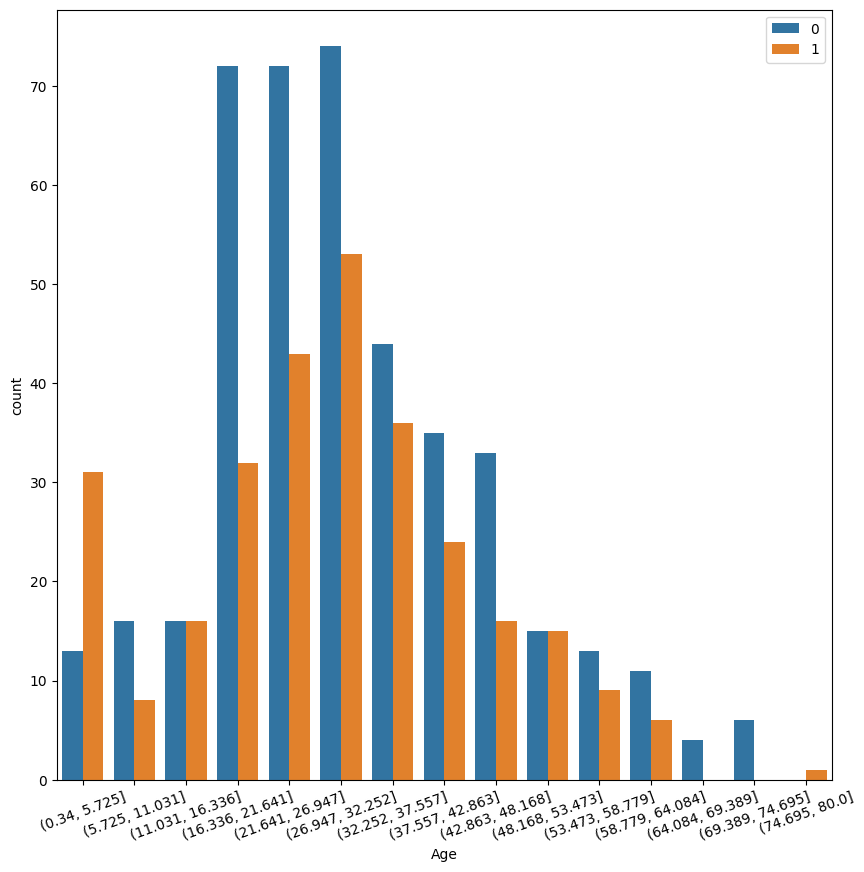

In [61]:
c = pd.cut(datas["Age"], 15)
plt.figure(figsize=(10, 10))
sns.countplot(x=c, hue=datas["Survived"])
plt.xticks(rotation=20)
plt.legend(loc="upper right")